In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from stock_analysis.stock_reader import StockReader # type: ignore
from stock_analysis.stock_visualizer import StockVisualizer
from stock_analysis.stock_visualizer import AssetGroupVisualizer
from stock_analysis.stock_analyzer import AssetGroupAnalyzer
from stock_analysis.stock_modeler import StockModeler

In [3]:
reader = StockReader('2017-01-01', '2018-12-31')

In [ ]:
fb, aapl, amzn, nflx, goog = reader.get_ticker_data('meta'), reader.get_ticker_data('aapl'), reader.get_ticker_data('amzn'), reader.get_ticker_data('nflx'),reader.get_ticker_data('goog') 
sp = reader.get_index_data('S&P500')
# bitcoin = reader.get_bitcoin_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
from stock_analysis.utils import group_stocks

faang = group_stocks(
    {
        'Facebook': fb,
        'Apple': aapl,
        'Amazon': amzn,
        'Netflix': nflx,
        'Google': goog
    }
)

faang_sp = group_stocks(
    {
        'Facebook': fb,
        'Apple': aapl,
        'Amazon': amzn,
        'Netflix': nflx,
        'Google': goog,
        'S&P 500': sp,
    }
)

faang_sp = group_stocks(
    {
        'Facebook': fb,
        'Apple': aapl,
        'Amazon': amzn,
        'Netflix': nflx,
        'Google': goog,
        'S&P 500': sp,
    }
)

bit_sp = group_stocks(
    {
        # 'Bitcoin': bitcoin,
        'S&P 500': sp,
    }
)

all_assets = group_stocks(
    {
        'Facebook': fb,
        'Apple': aapl,
        'Amazon': amzn,
        'Netflix': nflx,
        'Google': goog,
        'S&P 500': sp,
        # 'Bitcoin': bitcoin
    }
)

In [ ]:
describe_group(all_assets).loc['close', ]

NameError: name 'describe_group' is not defined

Text(0, 0.5, 'price ($)')

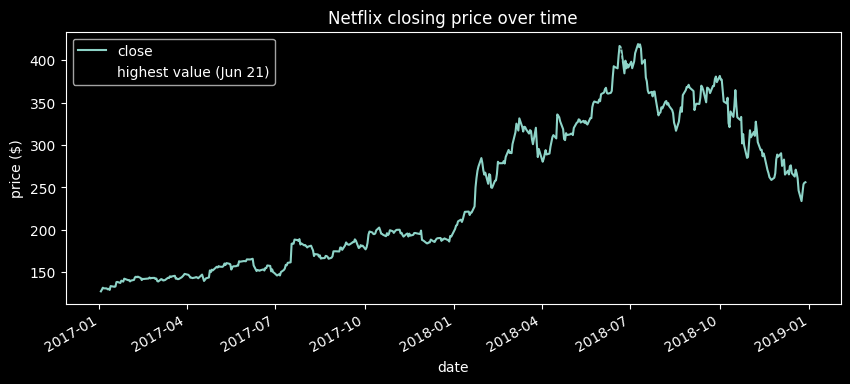

In [6]:
netflix_viz = StockVisualizer(nflx)

ax = netflix_viz.evolution_over_time(
    'close', figsize=(10, 4), legend=False,
    title='Netflix closing price over time'
)

netflix_viz.add_reference_line(
    ax, x=nflx.high.idxmax(), color='k', linestyle=':', alpha=0.5,
    label=f'highest value ({nflx.high.idxmax():%b %d})'
)
ax.set_ylabel('price ($)')

D:\Learnings\data_analytics\Data-Analytics-Learning-and-Projects\Chapter-7\stock_analysis\stock_analysis\stock_visualizer.py:271: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample("1M").sum()


array([<Axes: title={'center': "After hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='Price'>,
       <Axes: title={'center': 'After hours trading monthly effects'}, xlabel='date', ylabel='Price'>],
      dtype=object)

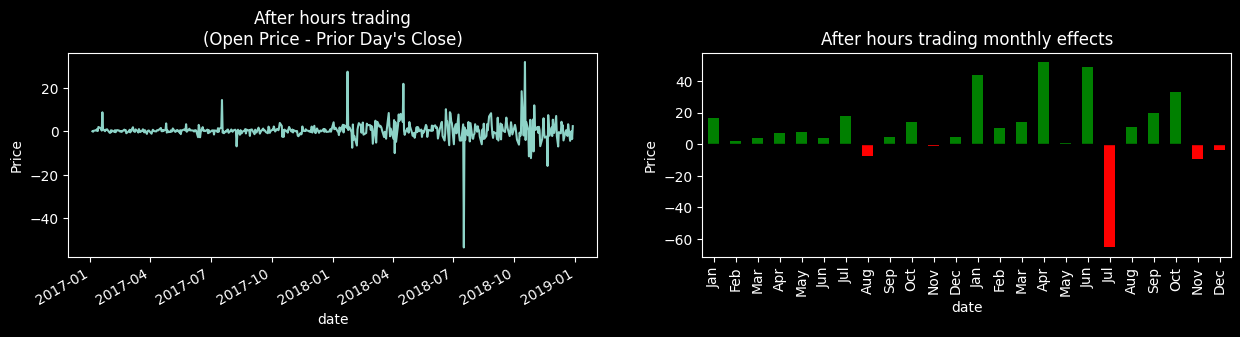

In [7]:
netflix_viz.after_hours_trades()

D:\Learnings\data_analytics\Data-Analytics-Learning-and-Projects\Chapter-7\stock_analysis\stock_analysis\stock_visualizer.py:255: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = self.data.volume.resample("1M").sum()


array([<Axes: title={'center': 'Closing Price'}, xlabel='date', ylabel='Price ($)'>,
       <Axes: title={'center': 'Volume Traded'}, xlabel='date', ylabel='Volume Traded'>],
      dtype=object)

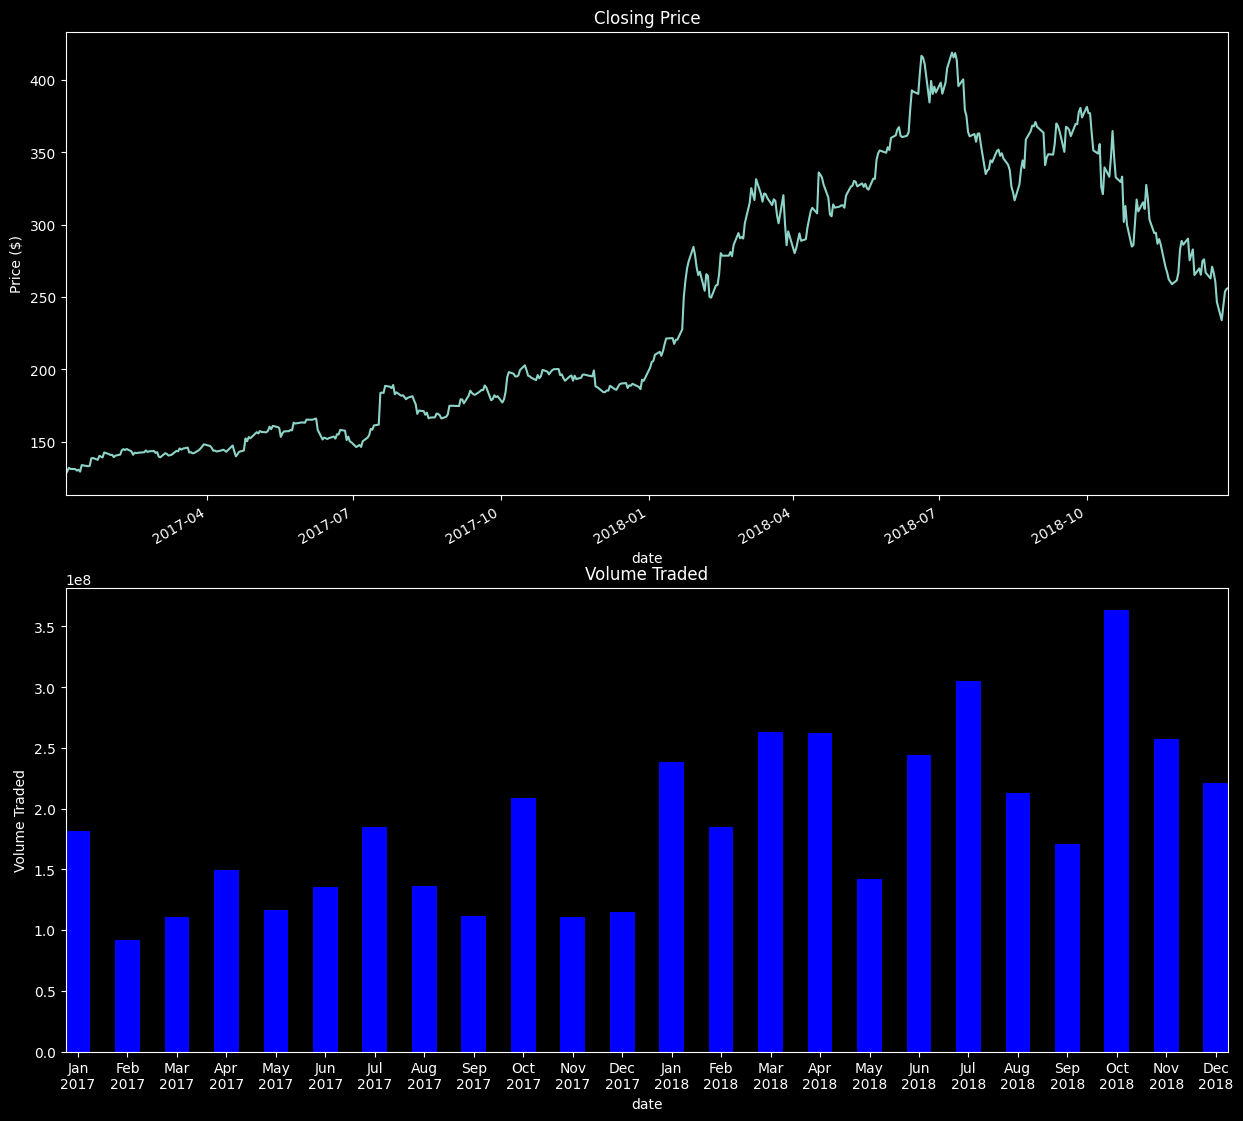

In [8]:
netflix_viz.trade_volume(True)

Text(0, 0.5, 'Price ($)')

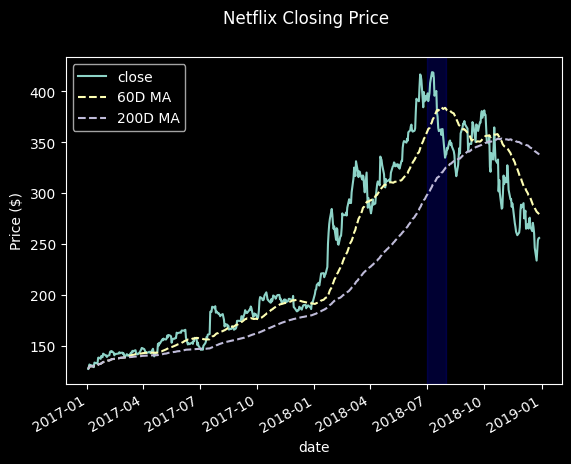

In [10]:
ax = netflix_viz.moving_average('close', ['60D', '200D'])
netflix_viz.shade_region(
    ax, x = ('2018-07-01', '2018-07-31'), color='blue', alpha=0.2
)
plt.suptitle('Netflix Closing Price')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

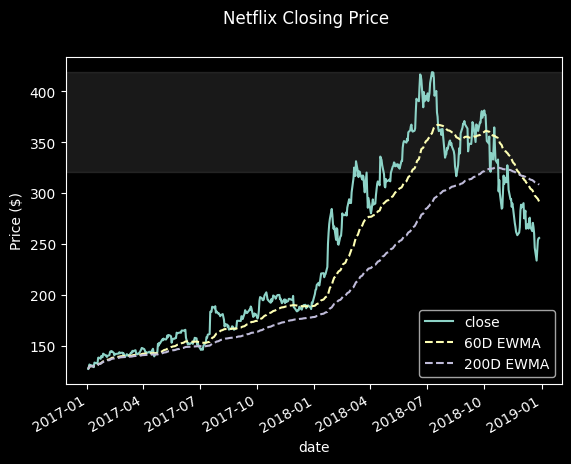

In [11]:
ax = netflix_viz.exp_smoothing('close', [60, 200])
q_3, q_4 = nflx.close.quantile([0.75, 1])
netflix_viz.shade_region(
    ax, y=(q_3, q_4), color='grey', alpha=0.2
)
plt.suptitle('Netflix Closing Price')
plt.ylabel('Price ($)')

<Axes: xlabel='name', ylabel='name'>

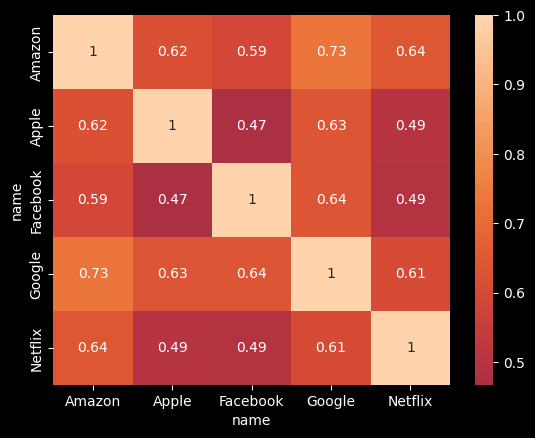

In [14]:
faang_viz = AssetGroupVisualizer(faang)
faang_viz.heatmap(True)

In [17]:
all_assets_analyzer = AssetGroupAnalyzer(
    all_assets
)

In [18]:
all_assets_analyzer.analyze('cv')

{'Amazon': np.float64(0.285721972695556),
 'Apple': np.float64(0.16245914779640594),
 'Facebook': np.float64(0.12253446225540228),
 'Google': np.float64(0.1181316670004634),
 'Netflix': np.float64(0.35429182716623475),
 'S&P 500': np.float64(0.07010885511812742)}

In [19]:
all_assets_analyzer.analyze('annualized_volatility')

{'Amazon': np.float64(0.36034063992017035),
 'Apple': np.float64(0.28689734007504325),
 'Facebook': np.float64(0.3795546631338453),
 'Google': np.float64(0.2807956690836299),
 'Netflix': np.float64(0.462511017339561),
 'S&P 500': np.float64(0.17003655178531188)}

In [20]:
all_assets_analyzer.analyze('is_bear_market')

{'Amazon': np.False_,
 'Apple': np.True_,
 'Facebook': np.False_,
 'Google': np.False_,
 'Netflix': np.False_,
 'S&P 500': np.False_}

In [21]:
all_assets_analyzer.analyze('beta', index=sp)

{'Amazon': np.float64(1.5807316270170313),
 'Apple': np.float64(1.2751569876151552),
 'Facebook': np.float64(1.284049244850648),
 'Google': np.float64(1.3580494432590575),
 'Netflix': np.float64(1.8258845413129252),
 'S&P 500': np.float64(0.9999999999999998)}

In [22]:
all_assets_analyzer.analyze('alpha', index=sp, r_f=2.46)

{'Amazon': np.float64(0.8158209082183164),
 'Apple': np.float64(0.2652714031973131),
 'Facebook': np.float64(0.01719852633739498),
 'Google': np.float64(0.19092907591603026),
 'Netflix': np.float64(0.8446363554391512),
 'S&P 500': np.float64(1.3877787807814457e-17)}

Text(0.5, 0.98, 'Cummulative Returns 2017-2018')

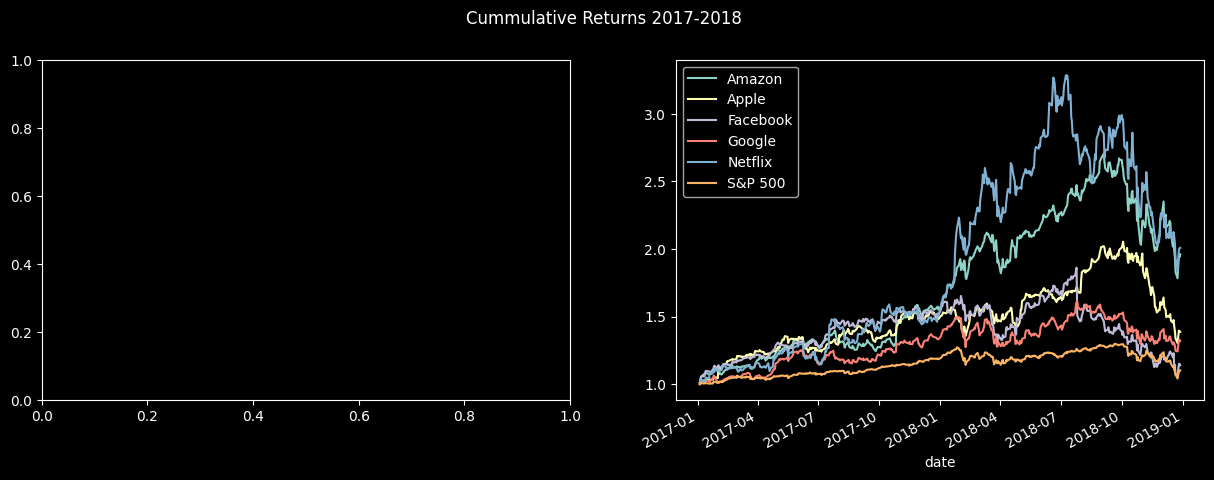

In [24]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
cummulative_returns = all_assets_analyzer.analyze(
    'cummulative_returns'
)
for name, data in cummulative_returns.items():
    data.plot(
        ax=axes[0] if name == 'Bitcoin' else axes[1],
        label=name,
        legend=True
    )
plt.suptitle('Cummulative Returns 2017-2018')

In [7]:
decomposition = StockModeler.decompose(nflx)
fig = decomposition.plot()
fig.suptitle('Netflix Stock Price Time Series Decomposition', y=1)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [8]:
arima_model = StockModeler.arima(nflx, ar=10, i=1, ma=5)
arima_model.summary()

d:\Learnings\data_analytics\Data-Analytics-Learning-and-Projects\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Learnings\data_analytics\Data-Analytics-Learning-and-Projects\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Learnings\data_analytics\Data-Analytics-Learning-and-Projects\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  519
Model:                ARIMA(10, 1, 5)   Log Likelihood               -1701.903
Date:                Wed, 11 Jun 2025   AIC                           3435.805
Time:                        16:46:44   BIC                           3503.805
Sample:                    01-03-2017   HQIC                          3462.448
                         - 12-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2591      0.285      0.908      0.364      -0.300       0.818
ar.L2          1.0164      0.135      7.535      0.000       0.752       1.281
ar.L3         -0.4639      0.261     -1.774      0.076      -0.976       0.049
ar.L4         -0.4844      0.120     -4.033      0.000      -0.720      -0.249
ar.L5          0.2979      0.208      1.433      0.152      -0.110       0.706
ar.L6         -0.0235      0.068     -0.345      0.730      -0.157       0.110
ar.L7          0.1542      0.062      2.499      0.012       0.033       0.275
ar.L8         -0.1808      0.057     -3.150      0.002      -0.293      -0.068
ar.L9         -0.0524      0.047     -1.114      0.265      -0.145       0.040
ar.L10         0.1705      0.049      3.501      0.000       0.075       0.266
ma.L1         -0.2463      0.292     -0.845      0.398      -0.818       0.325
ma.L2         -1.0340      0.136     -7.610      0.000      -1.300      -0.768
ma.L3          0.5231      0.272      1.921      0.055      -0.011       1.057
ma.L4          0.5612      0.118      4.769      0.000       0.331       0.792
ma.L5         -0.4955      0.240     -2.062      0.039      -0.967      -0.025
sigma2        40.0252      1.562     25.624      0.000      36.964      43.087
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               281.93
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               9.39   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

array([<Axes: title={'center': 'Residuals'}, xlabel='Date'>,
       <Axes: title={'center': 'Residulas KDE'}, xlabel='Residuals', ylabel='Density'>],
      dtype=object)

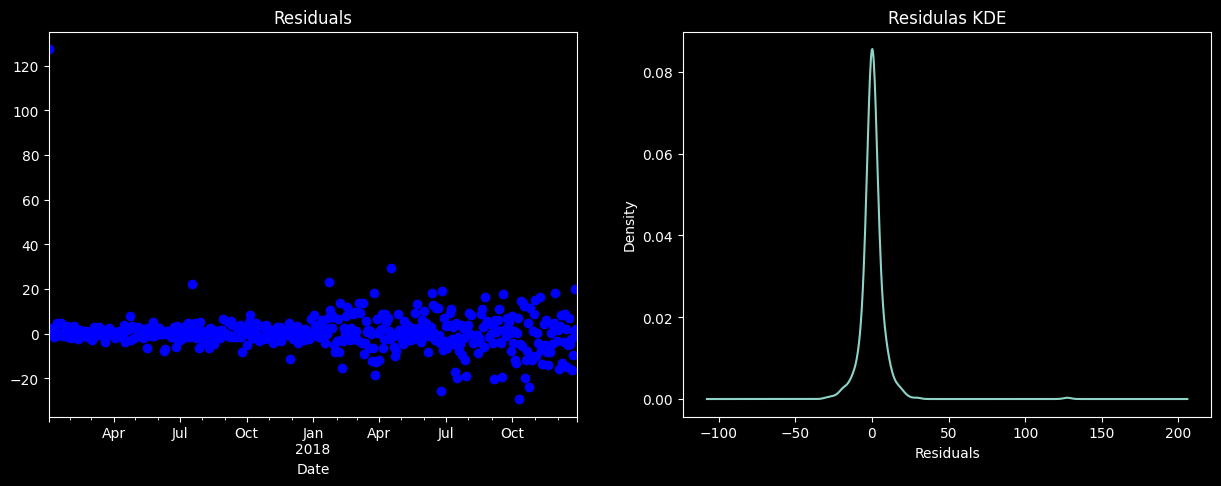

In [9]:
StockModeler.plot_residulas(arima_model)

In [11]:
X, Y, lm = StockModeler.regression(nflx)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.167e+05
Date:                Wed, 11 Jun 2025   Prob (F-statistic):                        0.00
Time:                        16:49:01   Log-Likelihood:                         -1666.8
No. Observations:                 500   AIC:                                      3336.
Df Residuals:                     499   BIC:                                      3340.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
close          1.0004      0.001    846.591      0.000       0.998       1.003
==============================================================================
Omnibus:                       56.486   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.894
Skew:                          -0.312   Prob(JB):                     3.05e-63
Kurtosis:                       6.665   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([<Axes: title={'center': 'Residuals'}, xlabel='Date'>,
       <Axes: title={'center': 'Residulas KDE'}, xlabel='Residuals', ylabel='Density'>],
      dtype=object)

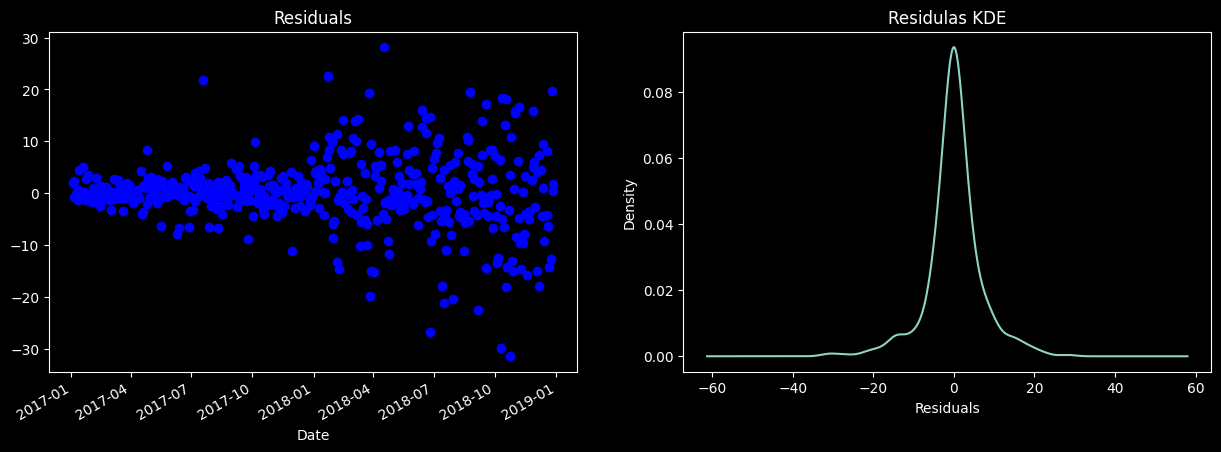

In [12]:
StockModeler.plot_residulas(lm)

[*********************100%***********************]  1 of 1 completed
D:\Learnings\data_analytics\Data-Analytics-Learning-and-Projects\Chapter-7\stock_analysis\stock_analysis\stock_modeler.py:127: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last = df.close[-1]


Text(0, 0.5, 'price ($)')

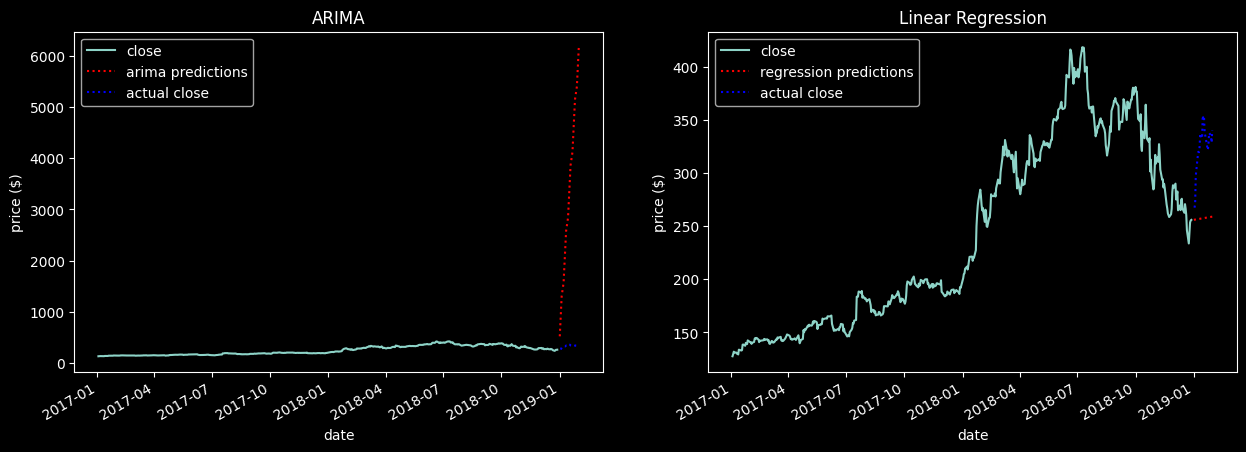

In [13]:
import datetime as dt

start = dt.date(2019, 1, 1)
end = dt.date(2019, 1, 31)

jan_2019 = StockReader(
    start, end
).get_ticker_data('NFLX')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

arima_ax = StockModeler.arima_predictions(
    nflx, arima_model, start=start, end=end,
    ax = axes[0], title="ARIMA"
)
jan_2019.close.plot(
    ax=arima_ax, style='b:', label='actual close'
)
arima_ax.legend()
arima_ax.set_ylabel('price ($)')

linear_reg = StockModeler.regression_predictions(
    nflx, lm, start=start, end=end,
    ax=axes[1], title='Linear Regression'
)
jan_2019.close.plot(
    ax=linear_reg, style='b:', label='actual close'
)
linear_reg.legend()
linear_reg.set_ylabel('price ($)')

#### Random Code for checking while learning

In [2]:
import pandas as pd

help(pd.DataFrame.cumprod)

Help on function cumprod in module pandas.core.frame:

cumprod(
    self,
    axis: 'Axis | None' = None,
    skipna: 'bool' = True,
    *args,
    **kwargs
)
    Return cumulative product over a DataFrame or Series axis.

    Returns a DataFrame or Series of the same size containing the cumulative
    product.

    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The index or the name of the axis. 0 is equivalent to None or 'index'.
        For `Series` this parameter is unused and defaults to 0.
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    *args, **kwargs
        Additional keywords have no effect but might be accepted for
        compatibility with NumPy.

    Returns
    -------
    Series or DataFrame
        Return cumulative product of Series or DataFrame.

    See Also
    --------
    core.window.expanding.Expanding.prod : Similar functionality
        but

In [3]:
print(pd.Timestamp('2021-04-22 01:30').ceil('D'))

2021-04-23 00:00:00


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(
    x,
    model='additive',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0
)
    Seasonal decomposition using moving averages.

    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series (e.g., 1 for annual, 4 for quarterly, etc). Must
        be used if x is not a pandas object or if the index of x does not have
        a frequency. Overrides default periodicity of x if x is a pandas
        object with